In [ ]:
import os
import shutil
import random
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import shutil

import glob
from skimage.feature import hog # for feature extraction


from tensorflow.keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Atelectasis_dir = "/content/drive/MyDrive/Atelectasis/resized/Atelectasis/"
normal_dir = "/content/drive/MyDrive/Atelectasis/resized/Normal/"

(224, 224, 3)


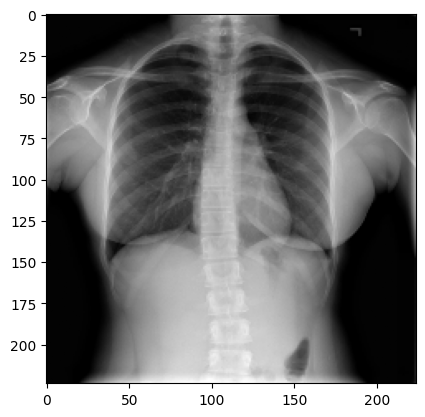

In [ ]:
path = normal_dir + os.listdir(normal_dir)[10]
img = mpimg.imread(path)
print(img.shape)
plt.imshow(img, cmap='gray')

(450, 450)
(224, 224)


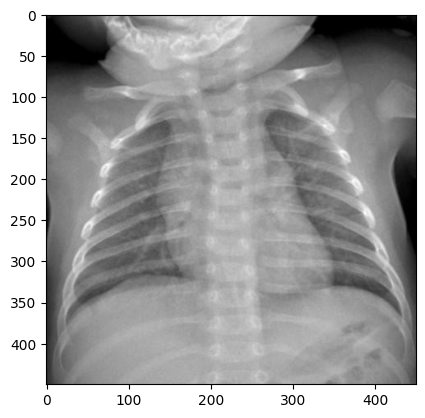

In [ ]:
path = normal_dir + os.listdir(normal_dir)[0]
img = mpimg.imread(path)
plt.imshow(img, cmap='gray')
print(img.shape)
resized_img = cv2.resize(img, (224,224))
print(resized_img.shape)




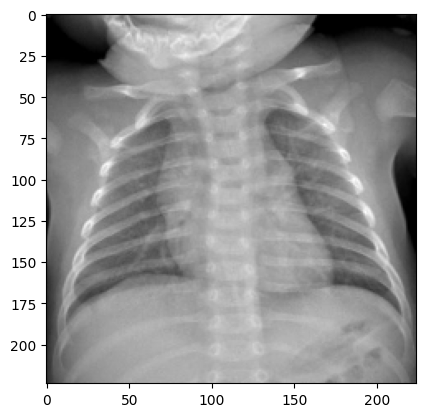

In [ ]:
plt.imshow(resized_img, cmap='gray')

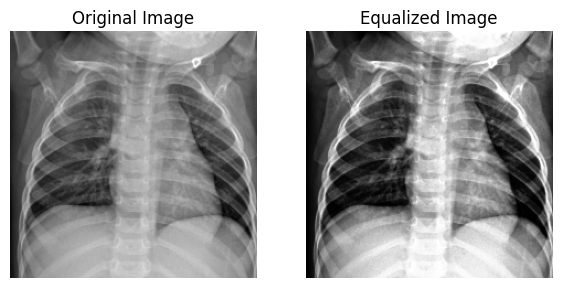

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image (replace 'your_image.jpg' with the actual file path)
image_path = '/content/drive/MyDrive/Atelectasis/resized/Normal/Normal 28.png'
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if original_img is None:
    print("Error: Unable to load the image.")
else:
    # Perform histogram equalization
    equalized_img = cv2.equalizeHist(original_img)

    # Display the original and equalized images
    plt.figure(figsize=(7, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.axis('off')
    plt.title('Equalized Image')

    plt.show()

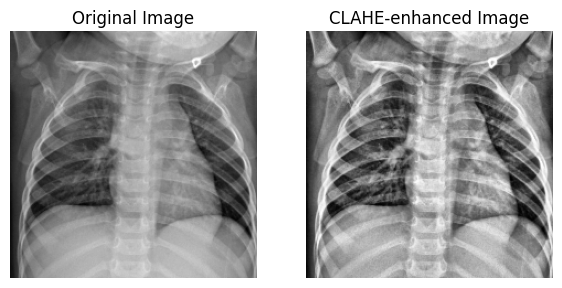

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image (replace 'your_image.jpg' with the actual file path)
image_path = '/content/drive/MyDrive/Atelectasis/resized/Normal/Normal 28.png'
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if original_img is None:
    print("Error: Unable to load the image.")
else:
    # Create a CLAHE object (Clip Limit and Tile Grid Size can be adjusted)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image
    clahe_img = clahe.apply(original_img)

    # Display the original and CLAHE-enhanced images
    plt.figure(figsize=(7, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(clahe_img, cmap='gray')
    plt.axis('off')
    plt.title('CLAHE-enhanced Image')

    plt.show()

In [ ]:
for image in range(len(os.listdir(Atelectasis_dir))):
    path = Atelectasis_dir+os.listdir(Atelectasis_dir)[image]
    img = cv2.imread(path,0)
    resized_image = cv2.resize(img, (224,224))
    #histequalized=histequalization(resized_image)
    clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(resized_image)
    cv2.imwrite('Atelectasis {}.png'.format(image), clahe_img)

In [ ]:
 for image in range(len(os.listdir(normal_dir))):
    path = normal_dir+os.listdir(normal_dir)[image]
    img = cv2.imread(path,0)
    resized_image = cv2.resize(img, (224,224))
    clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(resized_image)
    cv2.imwrite('Normal {}.png'.format(image), clahe_img)

In [ ]:
os.mkdir("/content/drive/MyDrive/Atelectasis/CLAHE")

In [ ]:
os.mkdir('/content/drive/MyDrive/Atelectasis/CLAHE/Normal')
os.mkdir('/content/drive/MyDrive/Atelectasis/CLAHE/Atelectasis')

In [ ]:
for file in os.listdir(os.getcwd()):
    if file.split(' ')[0] == 'Normal':
        dest = shutil.move(file, '/content/drive/MyDrive/Atelectasis/CLAHE/Normal')
    elif file.split(' ')[0] == 'Atelectasis':
        dest = shutil.move(file, '/content/drive/MyDrive/Atelectasis/CLAHE/Atelectasis')
    else:
        dest = ""

# splitting data to train and test

In [ ]:

root_dir = '/content/drive/MyDrive/Atelectasis/CLAHE/'
totalimages=0;
cls="Atelectasis"
src = root_dir + cls # Folder to copy images from
covidFileNames = os.listdir(src)
print("Covid images",len(covidFileNames))
totalimages=totalimages+len(covidFileNames)

root_dir = '/content/drive/MyDrive/Atelectasis/CLAHE/'
cls="Normal"
src = root_dir + cls # Folder to copy images from
normalFileNames = os.listdir(src)
print("Normal Images",len(normalFileNames))
totalimages=totalimages+len(normalFileNames)

print("Total Images",totalimages)

Covid images 2500
Normal Images 2500
Total Images 5000


In [ ]:
# # Creating Train / Val / Test folders (One time use)

root_dir = "/content/drive/MyDrive/Atelectasis/CLAHE/" # data root path
classes_dir = ['Atelectasis', 'Normal'] #total labels

test_ratio = 0.20
val_ratio = 0.00

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'vald/' + cls)
    os.makedirs(root_dir +'test/' + cls)



totalimage=0
testimage=0
valimage=0
trainimage=0
sys.stdout.write("Spliting")
sys.stdout.write("    ")
for cls in classes_dir:
    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - (val_ratio + test_ratio))),
                                                       int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
    totalimage=totalimage+len(allFileNames)
    trainimage=trainimage+len(train_FileNames)
    valimage=valimage+ len(val_FileNames)
    testimage=testimage+len(test_FileNames)

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/' + cls)
        sys.stdout.write(".")
    for name in val_FileNames:
        shutil.copy(name, root_dir +'vald/' + cls)
        sys.stdout.write(".")
    for name in test_FileNames:
        shutil.copy(name, root_dir +'test/' + cls)
        sys.stdout.write(".")


print("")
print('Total images: ', totalimage)
print('Training: ',trainimage)
print('Validation: ', valimage)
print('Testing: ', testimage)

Spliting    ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
import os
from PIL import Image
import seaborn as sns
SIZE=224

In [ ]:
train_images = []
train_labels = []
for directory_path in glob.glob('/content/drive/MyDrive/Atelectasis/CLAHE/train/*'):
    label = directory_path.split("/")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob('/content/drive/MyDrive/Atelectasis/CLAHE/test/*'):
    fruit_label = directory_path.split("/")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#le.fit(valid_labels)
#valid_label_encoded = le.transform(valid_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
# Normalize pixel values to between 0 and 1
#x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train,2)
y_test_one_hot = to_categorical(y_test,2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,train_label,valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.1, random_state=5)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
#print('x_valid shape:', x_valid.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#print(x_valid.shape[0], 'test samples')

x_train shape: (3600, 224, 224)
x_test shape: (1000, 224, 224)
3600 train samples
1000 test samples


In [ ]:
SIZE=224
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', strides=2,  padding = 'same', input_shape = (SIZE, SIZE,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
#model.add(BatchNormalization())

#model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
#model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
#model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
#model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
#model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(rate = 0.3))

In [ ]:
#Add layers for deep learning prediction
x = model.output
x = Dense(256, activation = 'relu')(x)
#model.add(Dropout(rate = 0.3))
prediction_layer = Dense(2, activation = 'sigmoid')(x)

In [ ]:
# Make a new model combining both feature extractor and x
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model = Model(inputs=model.input, outputs=prediction_layer)
cnn_model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['acc'])
print(cnn_model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15_input (InputLaye  [(None, 224, 224, 1)]     0         
 r)                                                              
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 56, 56, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 28, 28, 64)        0   

In [ ]:
import datetime
start = datetime.datetime.now()
#Train the CNN model
history = cnn_model.fit(x_train, train_label, epochs=50,batch_size = 64, validation_data = (x_valid, valid_label))
end = datetime.datetime.now()

print("Total execution time is: ", end-start)

Epoch 1/50
57/57 [==============================] - 17s 58ms/step - loss: 0.7009 - acc: 0.5353 - val_loss: 0.6682 - val_acc: 0.5950
Epoch 2/50
57/57 [==============================] - 2s 42ms/step - loss: 0.4484 - acc: 0.7836 - val_loss: 0.1772 - val_acc: 0.9600
Epoch 3/50
57/57 [==============================] - 2s 41ms/step - loss: 0.1343 - acc: 0.9533 - val_loss: 0.0901 - val_acc: 0.9875
Epoch 4/50
57/57 [==============================] - 2s 42ms/step - loss: 0.0715 - acc: 0.9728 - val_loss: 0.1272 - val_acc: 0.9500
Epoch 5/50
57/57 [==============================] - 2s 42ms/step - loss: 0.0449 - acc: 0.9828 - val_loss: 0.0643 - val_acc: 0.9825
Epoch 6/50
57/57 [==============================] - 3s 46ms/step - loss: 0.0790 - acc: 0.9744 - val_loss: 0.0623 - val_acc: 0.9850
Epoch 7/50
57/57 [==============================] - 3s 46ms/step - loss: 0.0542 - acc: 0.9775 - val_loss: 0.2021 - val_acc: 0.9225
Epoch 8/50
57/57 [==============================] - 2s 42ms/step - loss: 0.0514 - 

In [ ]:
model.save("CLAHE_After_Processing_Final.h5")

In [ ]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = cnn_model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 1s 20ms/step - loss: 0.0271 - acc: 0.9900
Test loss: 0.02711818739771843
Test accuracy: 0.9900000095367432


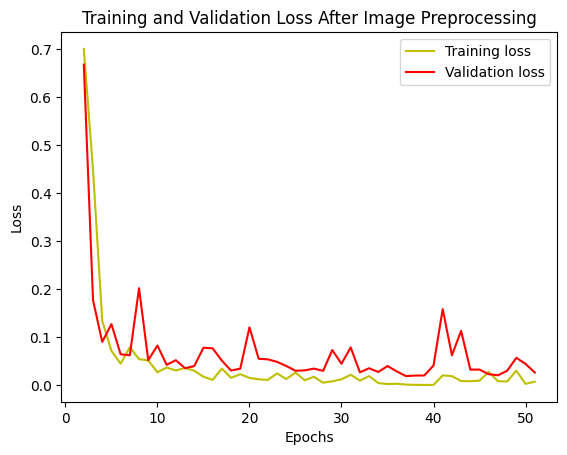

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(2, len(loss) + 2)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss After Image Preprocessing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

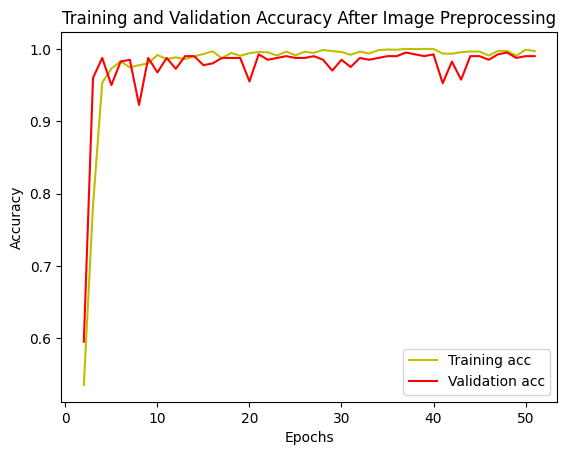

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy After Image Preprocessing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = cnn_model.evaluate(x_train, train_label, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

113/113 [==============================] - 1s 9ms/step - loss: 0.0029 - acc: 0.9989
Train loss: 0.002909122034907341
Train accuracy: 0.9988889098167419


In [ ]:
#Validation
score = cnn_model.evaluate(x_valid, valid_label, verbose=1)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

13/13 [==============================] - 0s 9ms/step - loss: 0.0263 - acc: 0.9900
Validation loss: 0.026314422488212585
Validation accuracy: 0.9900000095367432


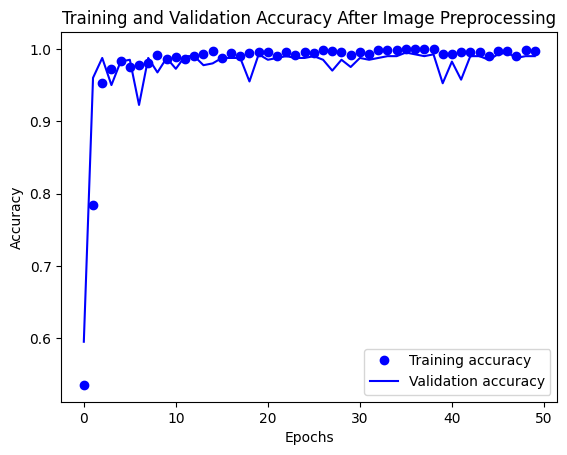

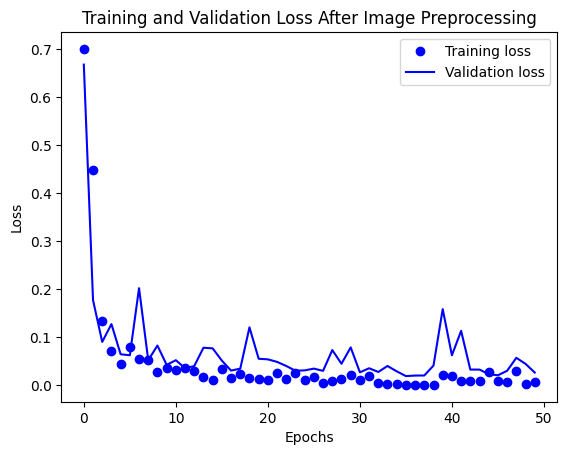

In [ ]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy After Image Preprocessing')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss After Image Preprocessing')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=1)
prediction_NN = le.inverse_transform(prediction_NN)

32/32 [==============================] - 1s 9ms/step


[[494   6]
 [  4 496]]


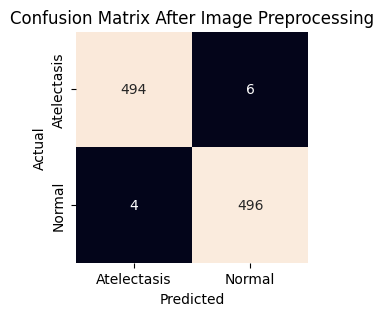

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
nClasses = ['Atelectasis','Normal']
plt.figure(figsize=(3,3))
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
plt.title('Confusion Matrix After Image Preprocessing')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(test_labels, prediction_NN, target_names=['Atelectasis  (Class 0)','Normal (Class 1)']))

                        precision    recall  f1-score   support

Atelectasis  (Class 0)       0.99      0.99      0.99       500
      Normal (Class 1)       0.99      0.99      0.99       500

              accuracy                           0.99      1000
             macro avg       0.99      0.99      0.99      1000
          weighted avg       0.99      0.99      0.99      1000



In [ ]:
predicted_classes = cnn_model.predict(x_test)

32/32 [==============================] - 0s 8ms/step


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((1000,), (1000,))

Found 990 correct labels


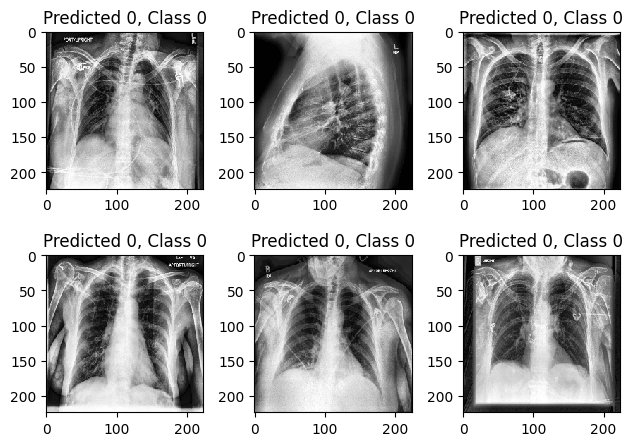

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 10 incorrect labels


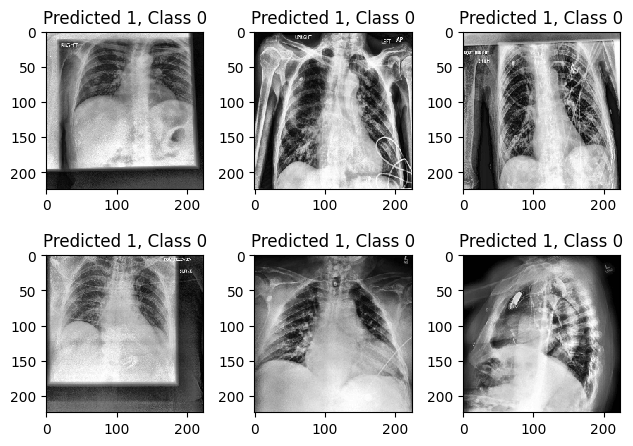

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()